In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
from IPython import display

In [2]:
url= 'https://raw.githubusercontent.com/orifelszer/project/main/violence_data.csv'
data_df= pd.read_csv(url)

In [3]:
data_df.head()

RecordID      Country Gender Demographics Question  \
0         1  Afghanistan      F        Marital status   
1         1  Afghanistan      F             Education   
2         1  Afghanistan      F             Education   
3         1  Afghanistan      F             Education   
4         1  Afghanistan      F        Marital status   

          Demographics Response                   Question Survey Year  Value  
0                 Never married  ... if she burns the food  01/01/2015    NaN  
1                        Higher  ... if she burns the food  01/01/2015   10.1  
2                     Secondary  ... if she burns the food  01/01/2015   13.7  
3                       Primary  ... if she burns the food  01/01/2015   13.8  
4  Widowed, divorced, separated  ... if she burns the food  01/01/2015   13.8

___Since we are working with the percentage of the people that answered the survey, empty values aren't relevant. Also the record ID isn't relevant___

In [4]:
data_df = data_df.dropna()


___Dropping the columns that are irrelevant to our project:___

In [5]:
irrelevant= ['Survey Year','RecordID']
data_df.drop(irrelevant, axis=1, inplace=True, errors='ignore')

___Proper data:___

In [6]:
data_df

Country Gender Demographics Question         Demographics Response  \
1      Afghanistan      F             Education                        Higher   
2      Afghanistan      F             Education                     Secondary   
3      Afghanistan      F             Education                       Primary   
4      Afghanistan      F        Marital status  Widowed, divorced, separated   
5      Afghanistan      F            Employment             Employed for kind   
...            ...    ...                   ...                           ...   
12595     Zimbabwe      M             Residence                         Urban   
12596     Zimbabwe      M             Residence                         Rural   
12597     Zimbabwe      M             Residence                         Urban   
12598     Zimbabwe      M             Residence                         Rural   
12599     Zimbabwe      M             Residence                         Urban   

                                      Question  Value  
1                    ... if she burns the food   10.1  
2                    ... if she burns the food   13.7  
3                    ... if she burns the food   13.8  
4                    ... if she burns the food   13.8  
5                    ... if she burns the food   17.0  
...                                        ...    ...  
12595  ... if she goes out without telling him   11.8  
12596         ... if she neglects the children   20.1  
12597         ... if she neglects the children   15.0  
12598  ... if she refuses to have sex with him    7.2  
12599  ... if she refuses to have sex with him    3.7  

[11187 rows x 6 columns]

 ___As we can see, our data it's a little bit unorganized and hard to work with it, so we're gonna group it and therefore appreciate it better.___

In [7]:
demographics_df = data_df.groupby(["Demographics Question", "Demographics Response"])["Value"].agg(["median", "max", "min", "mean"]).reset_index()
demographics_df.columns = ["Question", "Response", "Median", "Max", "Min", "Mean"]
demographics_df= demographics_df.sort_values(["Question", "Median"])
demographics_df

Question                      Response  Median   Max  Min       Mean
2              Age                         35-49   14.15  81.0  0.2  19.336412
1              Age                         25-34   14.45  81.5  0.1  19.703562
0              Age                         15-24   17.50  80.1  0.1  21.084169
3        Education                        Higher    4.20  74.6  0.0   8.898670
6        Education                     Secondary   13.05  76.7  0.2  17.378892
5        Education                       Primary   18.40  80.5  0.1  22.819093
4        Education                  No education   21.55  82.0  0.0  25.403125
9       Employment                    Unemployed   14.55  80.1  0.0  19.539710
7       Employment             Employed for cash   14.85  81.5  0.1  19.553804
8       Employment             Employed for kind   20.15  86.9  0.3  24.445541
10  Marital status    Married or living together   14.80  82.1  0.2  20.181003
11  Marital status                 Never married   14.90  72.1  0.0  18.704360
12  Marital status  Widowed, divorced, separated   17.15  75.9  0.0  20.683511
14       Residence                         Urban   11.05  74.4  0.1  15.895778
13       Residence                         Rural   19.00  82.1  0.2  23.294063

In [9]:
question_df = data_df.groupby(["Question"])["Value"].agg(["median", "max", "min", "mean"]).reset_index()
question_df.columns = ["Question", "Median", "Max", "Min", "Mean"]
print("Violence % median, min, max, and mean per question asked")
question_df = question_df.sort_values(["Median"])
question_df

Violence % median, min, max, and mean per question asked


Question  Median   Max  Min       Mean
2                ... if she burns the food     6.4  56.7  0.0   9.203445
5  ... if she refuses to have sex with him     9.0  68.7  0.0  13.209613
1               ... if she argues with him    15.7  76.5  0.0  18.983652
3  ... if she goes out without telling him    16.4  77.0  0.0  20.046321
4         ... if she neglects the children    20.8  75.6  0.0  23.461249
0     ... for at least one specific reason    31.0  86.9  0.0  33.217152

___We see in the data that it's ranked by question, for each one at least one different answer.
We decided to make comparations between the parameters of each question and the values of the survey, clasifing them by response and their respective demographic question:___ 

In [82]:
clean_data=data_df.loc[data_df.Question != '... for at least one specific reason']
clean_data

Country Gender Demographics Question         Demographics Response  \
1      Afghanistan      F             Education                        Higher   
2      Afghanistan      F             Education                     Secondary   
3      Afghanistan      F             Education                       Primary   
4      Afghanistan      F        Marital status  Widowed, divorced, separated   
5      Afghanistan      F            Employment             Employed for kind   
...            ...    ...                   ...                           ...   
12595     Zimbabwe      M             Residence                         Urban   
12596     Zimbabwe      M             Residence                         Rural   
12597     Zimbabwe      M             Residence                         Urban   
12598     Zimbabwe      M             Residence                         Rural   
12599     Zimbabwe      M             Residence                         Urban   

                                      Question  Value  
1                    ... if she burns the food   10.1  
2                    ... if she burns the food   13.7  
3                    ... if she burns the food   13.8  
4                    ... if she burns the food   13.8  
5                    ... if she burns the food   17.0  
...                                        ...    ...  
12595  ... if she goes out without telling him   11.8  
12596         ... if she neglects the children   20.1  
12597         ... if she neglects the children   15.0  
12598  ... if she refuses to have sex with him    7.2  
12599  ... if she refuses to have sex with him    3.7  

[9298 rows x 6 columns]

___As well we've seen that the answer 'for at least one specific reason' has the greater value and it's not that specific as it says. So we've decided to drop it also.___

In [84]:
education= clean_data[clean_data.loc[:,"Demographics Question"] == "Education"]

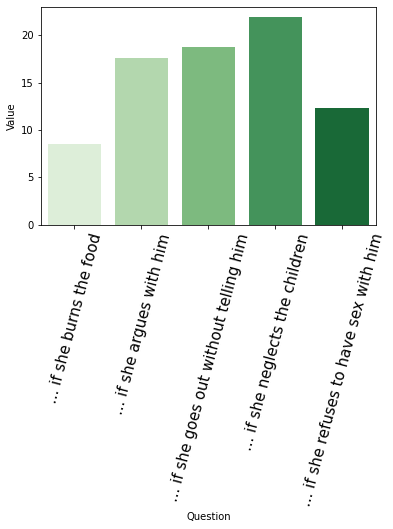

In [85]:
sns.barplot( data= education, y='Value',x='Question', palette = 'Greens',ci=None)
plt.xticks(rotation=75, fontsize= 15);

In [11]:
Employment_women= data_df.loc[data_df['Demographics Question']== 'Employment']

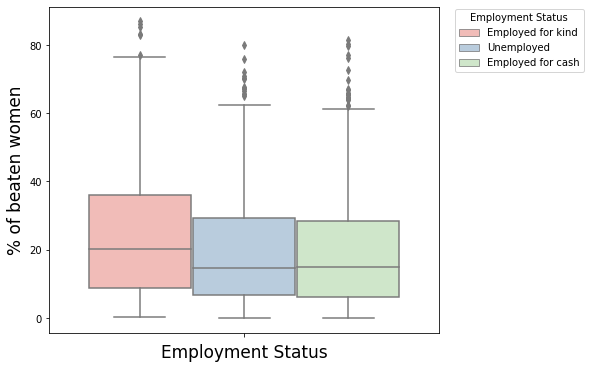

In [12]:
plt.figure(figsize = (7,6));
ax= sns.boxplot( data= Employment_women, y='Value',x='Demographics Question', hue='Demographics Response',palette='Pastel1')
plt.legend(title='Employment Status', loc=(1.04,0.8))
plt.xlabel('Employment Status',fontsize=17)
plt.ylabel('% of beaten women',fontsize=17)
ax.set(xticklabels=[]);

Conclusion of Atalya

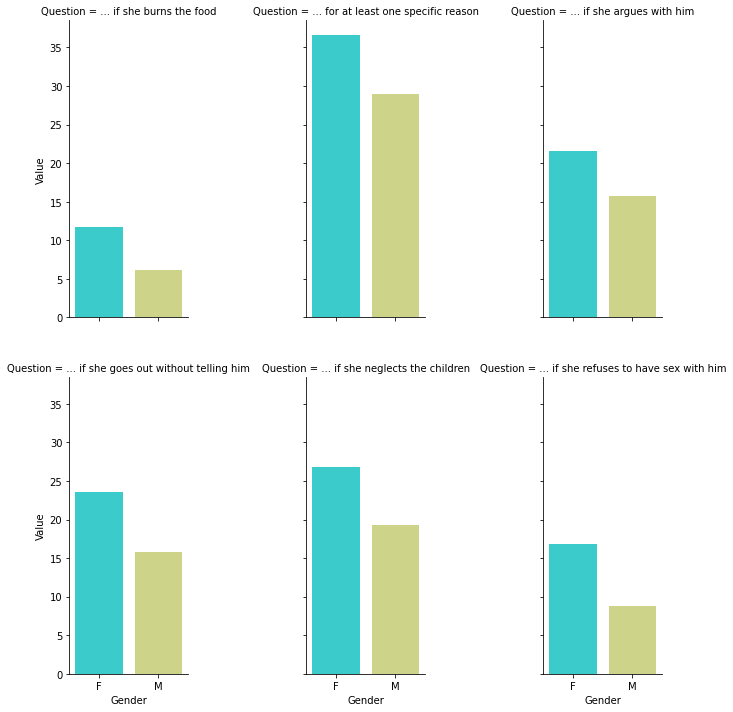

In [13]:
g = sns.catplot(x="Gender", y="Value", col="Question",
                data=data_df, saturation=.8,
                kind="bar", ci=None, aspect=.6, col_wrap=3, palette = 'rainbow')
plt.subplots_adjust(wspace = 1, hspace =0.2)

Conclusion : The survey shows that the reason that causes the most for women to be beaten is 'If she neglects the children' according to men and women.

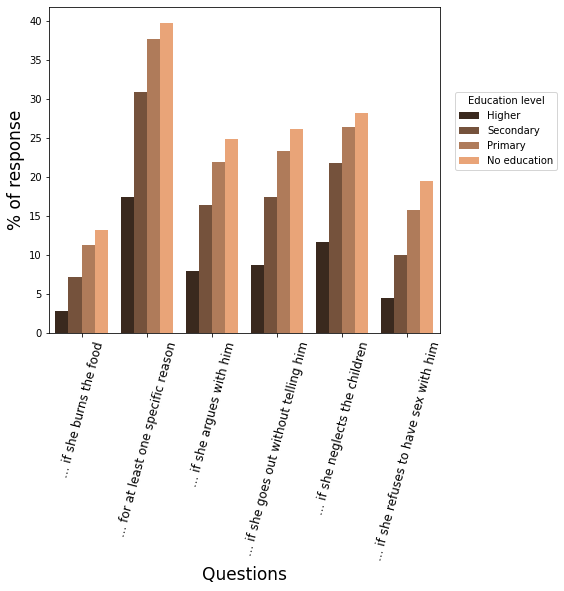

In [14]:
plt.figure(figsize = (7,6))
ax= sns.barplot( data= education, y='Value',x='Question', hue='Demographics Response',ci = None, palette = 'copper');
plt.xticks(rotation=75, fontsize= 12);
plt.legend(title='Education level', loc=(1.04,0.5))
plt.xlabel('Questions',fontsize=17)
plt.ylabel('% of response',fontsize=17);

In [15]:
marital = data_df[data_df.loc[:,"Demographics Question"] =="Marital status"]

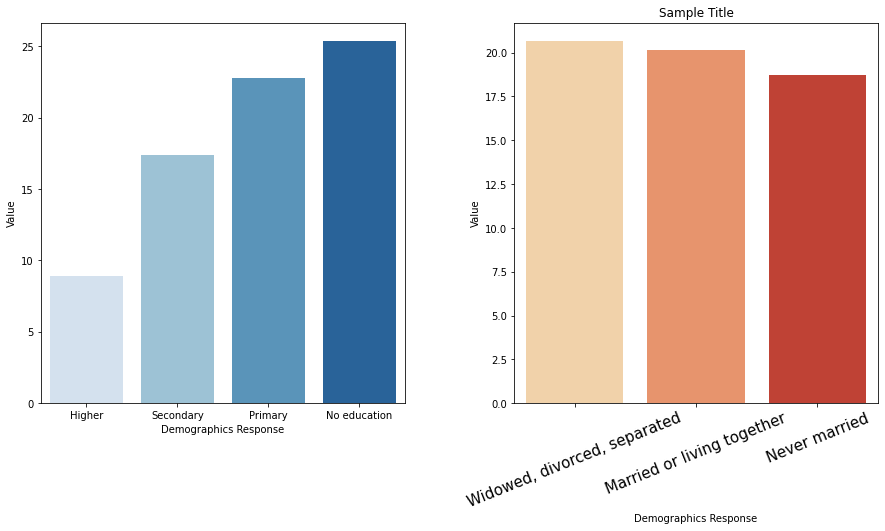

In [16]:
fig, axes = plt.subplots(figsize=(15,7), ncols=2)
plt.subplots_adjust(wspace = 0.3)
#plt.figure(figsize = (7,6))
uno=sns.barplot( data= education, y='Value',x='Demographics Response',ci=None, palette = 'Blues',ax=axes[0])
plt.xticks(rotation=75, fontsize= 15)
plt.title('Sample Title')
dos=sns.barplot( data= marital, y='Value',x='Demographics Response',ci=None, palette = 'OrRd', ax=axes[1])
plt.xticks(rotation=22, fontsize= 15);
ax.set(xticklabels='');

Conclusion : Orina tessaymi et a natsatanim bbait

In [17]:
residence= data_df[data_df.loc[:,"Demographics Question"] == "Residence"]

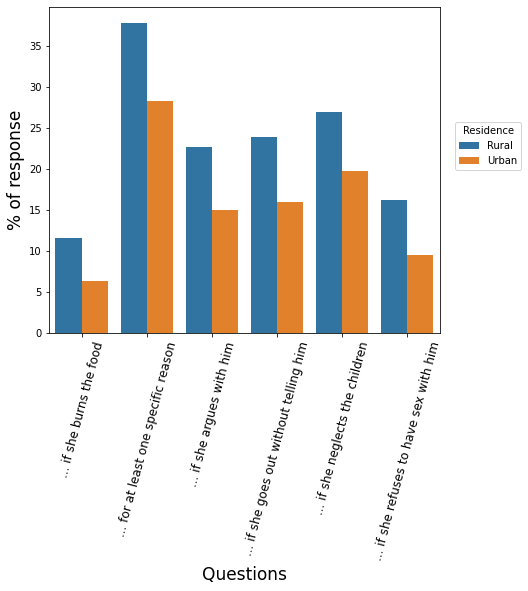

In [18]:
plt.figure(figsize = (7,6))
ax= sns.barplot( data= residence, y='Value',x='Question', hue='Demographics Response',ci = None);
plt.xticks(rotation=75, fontsize= 12);
plt.legend(title='Residence', loc=(1.04,0.5))
plt.xlabel('Questions',fontsize=17)
plt.ylabel('% of response',fontsize=17);

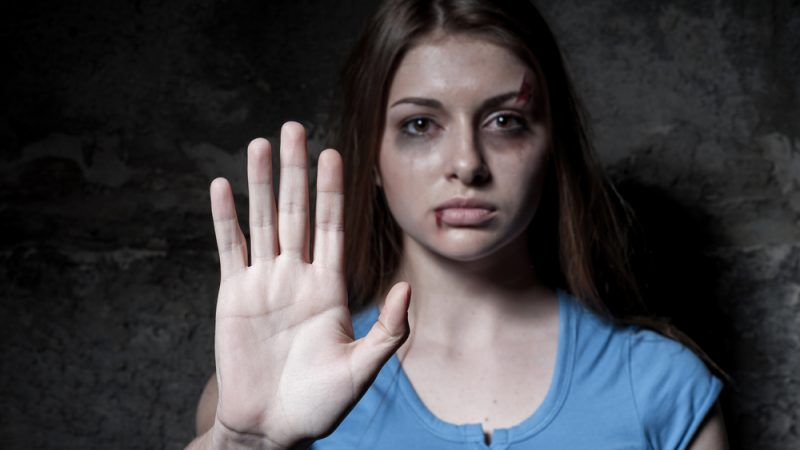

In [19]:
display.Image('https://www.euractiv.com/wp-content/uploads/sites/2/2019/11/violence-800x450.jpg')

In [20]:
just_women= data_df.loc[data_df.Gender== 'F']


More women than men have answered the survey. 6143 vs 5044

In [21]:
#USING DUMMIES
dummie_gender = pd.get_dummies(data=data_df, columns=['Gender'])


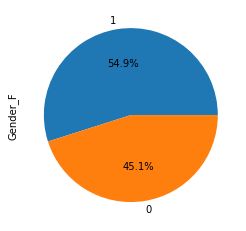

In [22]:
dummie_gender['Gender_F'].value_counts().plot.pie(autopct='%1.1f%%');

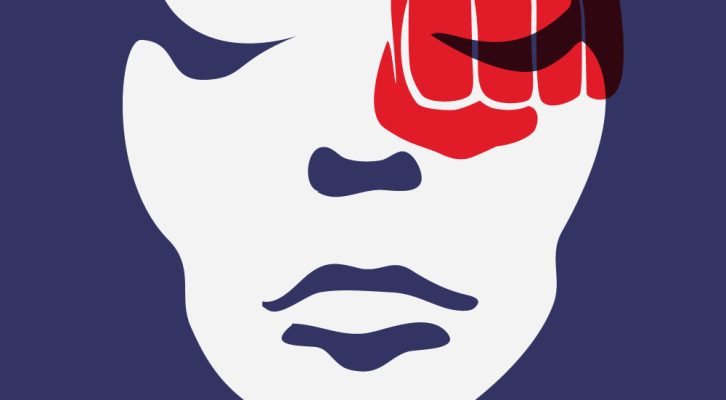

In [23]:
display.Image('https://researchleap.com/wp-content/uploads/2018/05/a6.jpg')

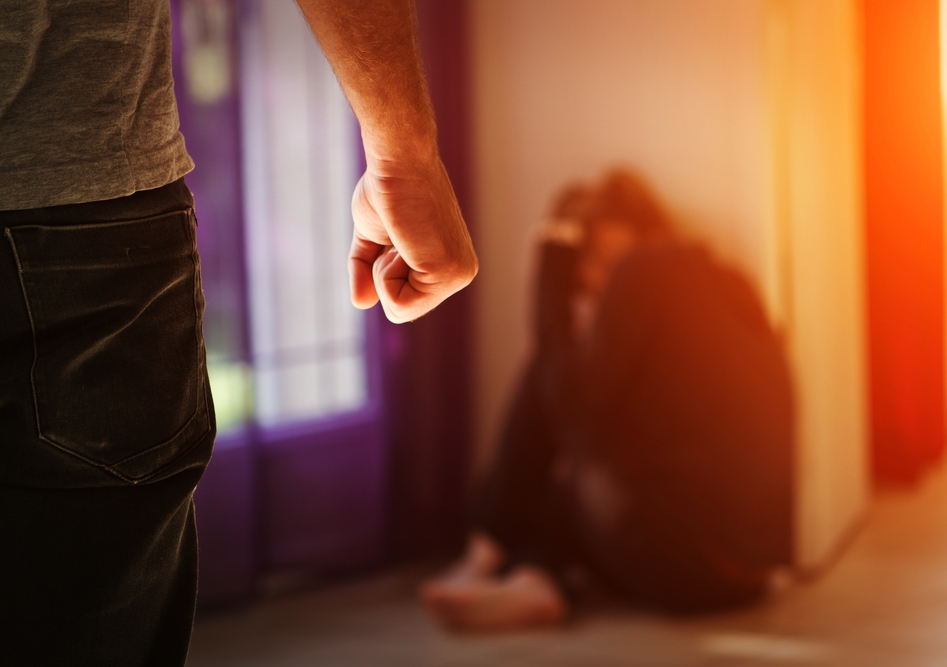

In [24]:
display.Image('https://newsroom.unsw.edu.au/sites/default/files/thumbnails/image/shutterstock_379612687_3.jpg',width=800, height=700)

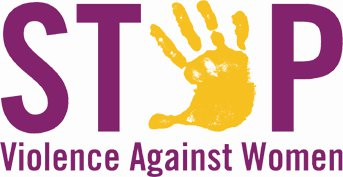

In [25]:
display.Image('http://publish.illinois.edu/globalcurrents/files/2014/10/Stop-Violence-Against-Women-2.jpg')

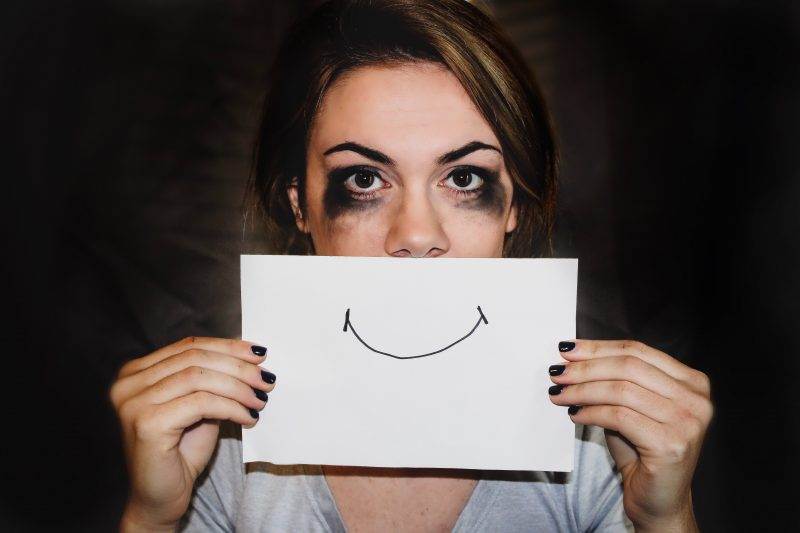

In [26]:
display.Image('https://italicsmag.com/wp-content/uploads/2018/09/sydney-sims-519706-unsplash-800x533.jpg')

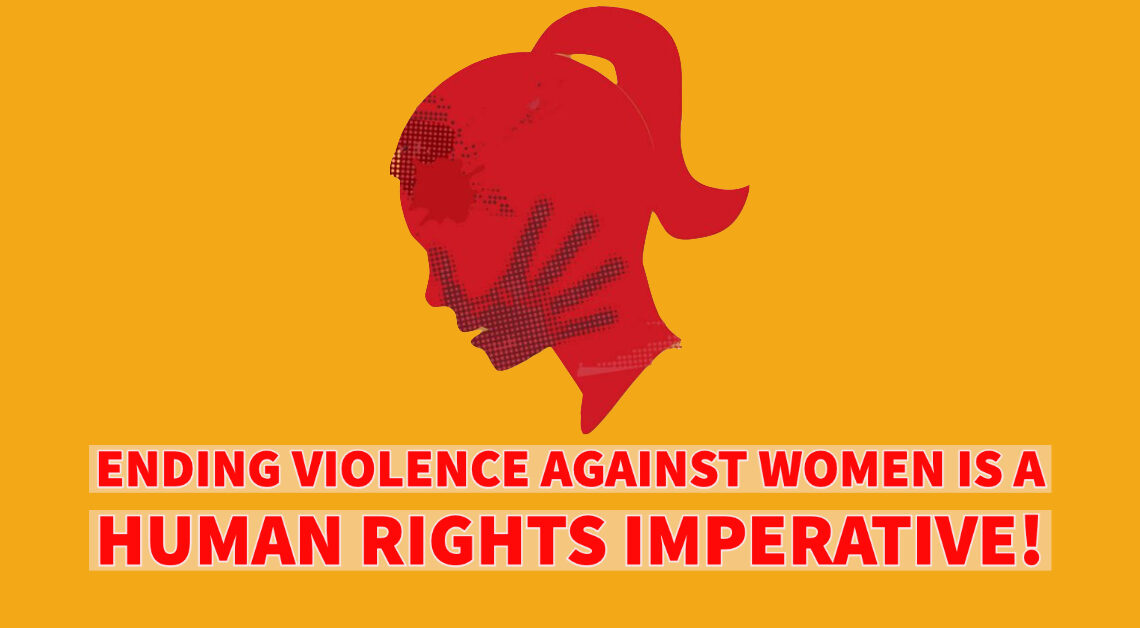

In [27]:
display.Image('https://d2v9ipibika81v.cloudfront.net/uploads/sites/37/International-Day-against-violence-towards-women--1140x628.jpg',width=900, height=700)

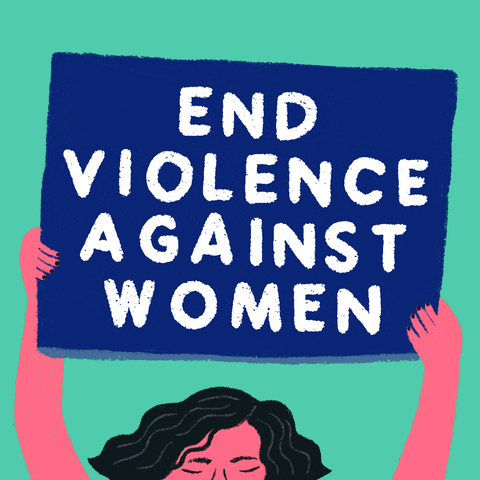

In [28]:
display.Image('https://media3.giphy.com/media/BN94gqAfZtZ1M9XXT2/giphy.gif')

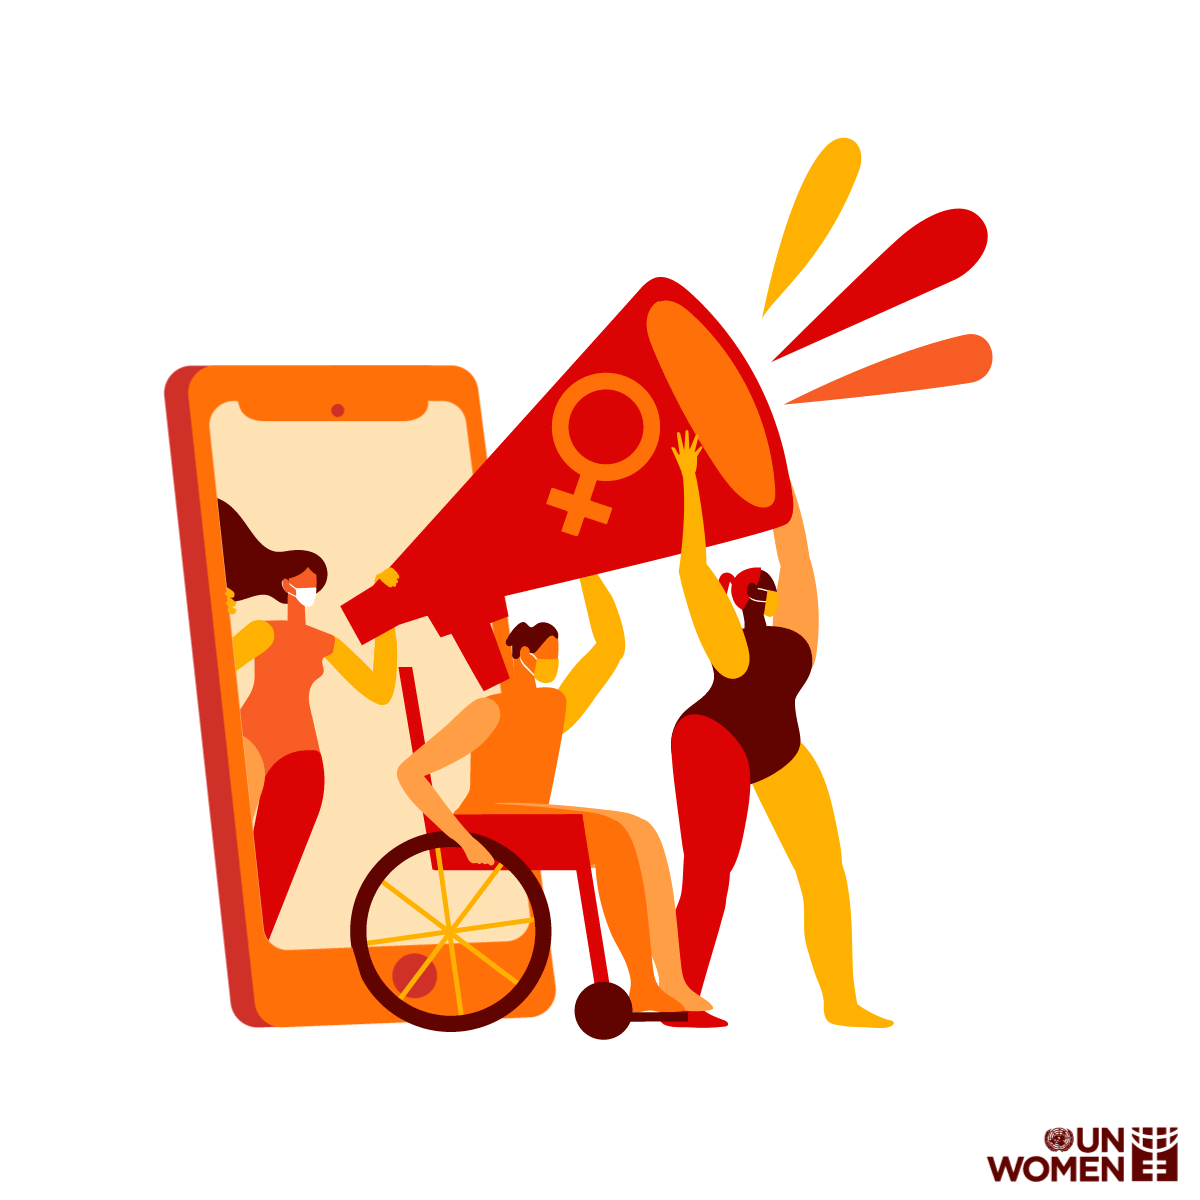

In [29]:
display.Image('https://www.unwomen.org/sites/default/files/Headquarters/Images/Sections/News/Stories/2020/11/16Days-Action-Conversation.gif',width=700, height=600)

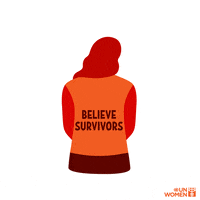

In [30]:
display.Image('https://media4.giphy.com/media/Ur70feo2UvQcYeeGmw/200w.gif')

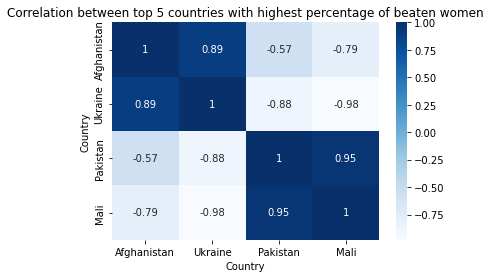

In [31]:
demor_df = data_df.groupby(["Demographics Question", "Demographics Response", "Question", 'Country'])["Value"].agg(["median", "mean"]).reset_index()
demor_df = demor_df.loc[demor_df["Demographics Question"] == 'Age']
demor_df = demor_df.sort_values(by='mean', ascending=False)
#demor_df = demor_df.head(15)
ex=demor_df.pivot_table('median', index='Country', columns='Demographics Response')
demor_df=demor_df.pivot_table('median', index='Demographics Response', columns='Country') 
features = ['Afghanistan','Ukraine','Pakistan', 'Mali']
corr = demor_df[features].corr().round(2)
corr.corr(method='spearman')
ax = sns.heatmap(data=corr,cmap='Blues', annot=True)
ax.set_title('Correlation between top 5 countries with highest percentage of beaten women');

From this correlation we can observe that 

In [32]:
ex=ex.sort_values(by='15-24',ascending=False)

In [33]:
ex=ex.iloc[:5]

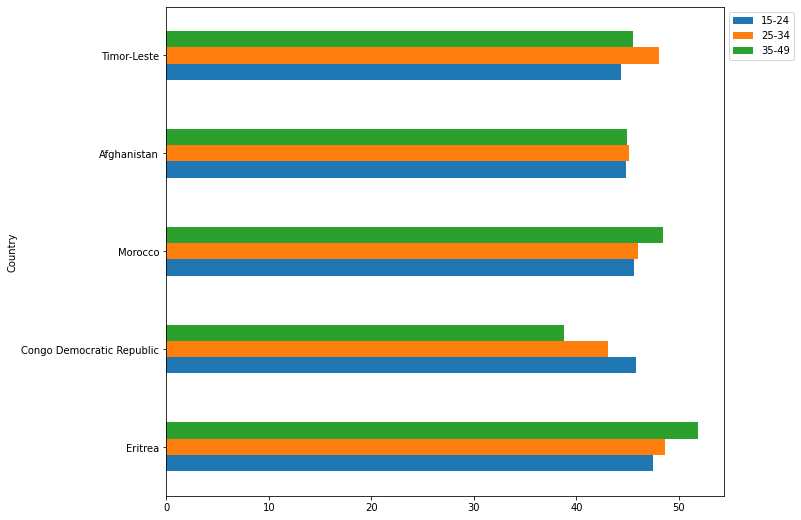

In [34]:
ex.plot(kind='barh',figsize=(10,9) )
plt.legend(bbox_to_anchor=(1,1));

In [35]:
demoq_df = data_df.groupby(["Country","Demographics Question", "Demographics Response", "Question"])["Value"].agg(["median", "mean"]).reset_index()

In [36]:
demoq_df.columns = ["Country","Demographics Question", "Demographics Response", "Question", "Median", "Mean"]
demoq_df = demoq_df.sort_values(["Demographics Question", "Demographics Response", "Median"])
demoq_df.rename(columns = {'Demographics Question':'Age'}, inplace = True)
data_aron = demoq_df.loc[demoq_df.Age == 'Age']
data_aron.drop(['Age', 'Median'], axis=1)
data_aron.pivot_table('Mean', index='Country', columns='Demographics Response') 

Demographics Response      15-24      25-34      35-49
Country                                               
Afghanistan            44.875000  45.158333  44.958333
Albania                 3.666667   4.316667   4.775000
Angola                 13.591667  12.366667  12.458333
Armenia                 8.400000   8.458333   8.375000
Azerbaijan             32.566667  33.391667  31.366667
...                          ...        ...        ...
Uganda                 29.741667  22.433333  22.600000
Ukraine                 2.516667   4.000000   3.558333
Yemen                  27.933333  29.466667  31.933333
Zambia                 26.716667  24.258333  23.600000
Zimbabwe               23.433333  15.775000  12.741667

[70 rows x 3 columns]

In [37]:
data_df.pivot_table('Value', index='Country', columns='Demographics Question', aggfunc='median') 

Demographics Question    Age  Education  Employment  Marital status  Residence
Country                                                                       
Afghanistan            46.55      41.05       47.95           39.80      46.35
Albania                 3.60       4.00        3.85            3.95       3.40
Angola                 12.10      10.80       12.05           12.40      11.90
Armenia                 6.80       6.35        8.15            6.25       6.70
Azerbaijan             34.80      35.65       34.35           32.15      35.25
...                      ...        ...         ...             ...        ...
Uganda                 23.05      20.05       26.35           26.25      22.05
Ukraine                 2.25       2.30        3.00            2.20       2.70
Yemen                  30.85      20.15       27.90           30.30      23.90
Zambia                 25.10      19.65       25.50           24.90      23.45
Zimbabwe               15.35      17.40       17.80           16.65      15.85

[70 rows x 5 columns]

In [38]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))
# For attribute join
country_shapes = world[['geometry', 'iso_a3']]
country_names = world[['name', 'iso_a3']]
# For spatial join
countries = world[['geometry', 'name']]
countries = countries.rename(columns={'name':'country'})
joined = world.geometry.append(cities.geometry)
country_shapes = country_shapes.merge(country_names, on='iso_a3')

NameError: name 'geopandas' is not defined

In [ ]:
merged_df = gdf.merge(data_aron, left_on=['Country'], right_on=['Country'], how= 'left')
merged_df.sort_values(by='Mean')
merged_df.Median[merged_df.Median.isna()]=10
merged_df.Median[merged_df.Median==0]=5
merged_df.plot(column='Median',cmap='gist_heat_r',figsize=(15,15),legend = True, legend_kwds={'label': 'Percent surveyed pop. that agrees with statement avgd. over demographic and age', 'orientation': "horizontal"})
plt.axis('off');